In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['animation.ffmpeg_path']='/mnt/d/ffmpeg/bin/ffmpeg.exe'

## Model of HH disease



Reference: On the mathematical modelling of wound healing angiogenesis in skin as a reaction-transport process.

$$ \frac{\partial H}{\partial t} = -\textbf{c}\frac{\partial H}{\partial y}+\boldsymbol{\lambda} H(H-\textbf{a})(\textbf{b}-H)+\nabla\cdot(\textbf{D}\nabla H) $$

TODO: Include derviation of model from conservation of mass

In [2]:
#numerical parameters for pde 
T=1000
dt=0.01
dx=0.01

M=np.meshgrid(np.array([range(0,98)]),np.array([range(0,99)]))[1]
M=M/100

#layer thicknesses
spinosum_layer_thickness=0.4
corneum_layer_thickness=0.2
air=1-spinosum_layer_thickness-corneum_layer_thickness

#initatiate layers
spinosum=M>=spinosum_layer_thickness
corneum=np.logical_and(M<1-spinosum_layer_thickness,M>1-spinosum_layer_thickness-corneum_layer_thickness)


#spinosum parameters
a_spinosum=0.2
b_spinosum=0.5
lambda_spinosum=0
D_spinosum=0
c_spinosum=0.2

#coreum parameters
a_corneum=0.6
b_corneum=1
lambda_corneum=10
D_corneum=0.0001
c_corneum=0.01

#speed of cell movement
c=c_spinosum*spinosum+c_corneum*corneum

a=a_spinosum*spinosum+a_corneum*a_spinosum
b=b_spinosum*spinosum+b_corneum*b_spinosum
lam=lambda_spinosum*spinosum+lambda_corneum*corneum
D=D_corneum*corneum+D_spinosum*spinosum
c=c_corneum*corneum+c_spinosum*spinosum

#healthy_ratio=
#unhealthy_ratio=

#initialise H
H=np.zeros([100,100])

In [3]:
def update_H(H):
    
    advection=c*(H[1:101,1:99]-H[0:99,1:99])/dx
    
    growth=lam*H[0:99,1:99]*(H[0:99,1:99]-a)*(b-H[0:99,1:99])
    
    dispersal=D*(H[0:99,0:98]-H[0:99,1:99])-H[0:99,2:100]*[(H[0:99,1:99]-H[0:99,2:100])# currently only in x direction
    dispersal=dispersal/(dx**2)
    
    dHbydt=advection + growth + dispersal
    dH=dHbydt*dt
    
    H[0:99,1:99]=H[0:99,1:99]+dH
    
    return H
    

SyntaxError: '[' was never closed (3037375745.py, line 7)

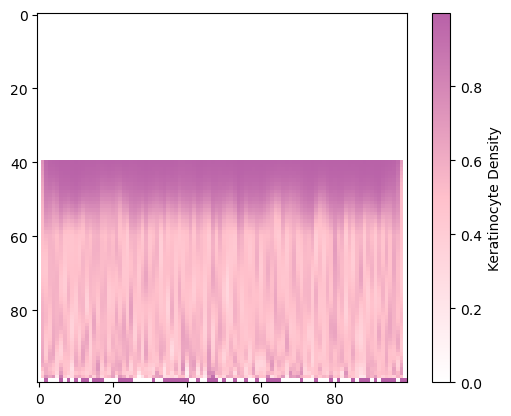

In [40]:
#stable

#initial condition
H[99,:]=np.random.uniform(0,1,100)*0.6+0.4

fig=plt.figure()
custom_cmap=LinearSegmentedColormap.from_list('custom',['white','pink','#b861a8'])
l =plt.imshow(H,cmap=custom_cmap)
cbar=plt.colorbar(label='Keratinocyte Density')



metadata = dict(title='Movie', artist='Jack')
writer = FFMpegWriter(fps=50,metadata=metadata)


with writer.saving(fig,'stability.gif',100):
    for i in range(1,T):
        H=update_H(H)
            
        if i%1==0:
            prolif=np.random.uniform(0,1,size=[100])>.5
            H[99,0:100]=prolif

        
        l.set_data(H)
        writer.grab_frame()

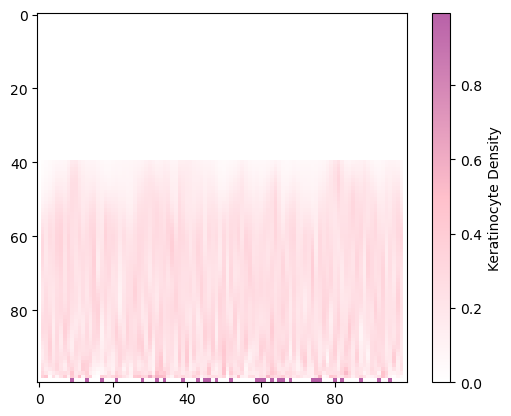

In [38]:
#unstable

#initial condition
H[99,:]=np.random.uniform(0,1,100)*0.6+0.4

fig=plt.figure()
custom_cmap=LinearSegmentedColormap.from_list('custom',['white','pink','#b861a8'])
l =plt.imshow(H,cmap=custom_cmap)
cbar=plt.colorbar(label='Keratinocyte Density')



metadata = dict(title='Movie', artist='Jack')
writer = FFMpegWriter(fps=50,metadata=metadata)


with writer.saving(fig,'instability.gif',100):
    for i in range(1,T):
        H=update_H(H)
            
        if i%1==0:
            prolif=np.random.uniform(0,1,size=[100])>.75
            H[99,0:100]=prolif

        
        l.set_data(H)
        writer.grab_frame()